<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<b>Описание тарифов</b><br><br>
<b>Тариф «Смарт»</b><br>
<ol>
<li>Ежемесячная плата: 550 рублей</li>
<li>Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика</li>
<li>Стоимость услуг сверх тарифного пакета:</li>
</ol>
<ul>
<li>минута разговора: 3 рубля<br></li>
<li>сообщение: 3 рубля<br></li>
<li>1 Гб интернет-трафика: 200 рублей<br></li>
</ul>
<b>Тариф «Ультра»</b><br>
<ol>
<li>Ежемесячная плата: 1950 рублей</li>
<li>Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика</li>
<li>Стоимость услуг сверх тарифного пакета:</li>
</ol>
<ul>
<li>минута разговора: 1 рубль</li>
<li>сообщение: 1 рубль</li>
<li>1 Гб интернет-трафика: 150 рублей</li>
</ul>

## Изучение данных из файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy import stats as st

In [2]:
data_calls= pd.read_csv('datasets/calls.csv')
data_internet= pd.read_csv('datasets/internet.csv')
data_messages= pd.read_csv('datasets/messages.csv')
data_tariffs= pd.read_csv('datasets/tariffs.csv')
data_users= pd.read_csv('datasets/users.csv')

#изучаем таблицу
display(data_calls.head(10))
print(data_calls.info()) 
display(data_calls.describe()) 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


<AxesSubplot:>

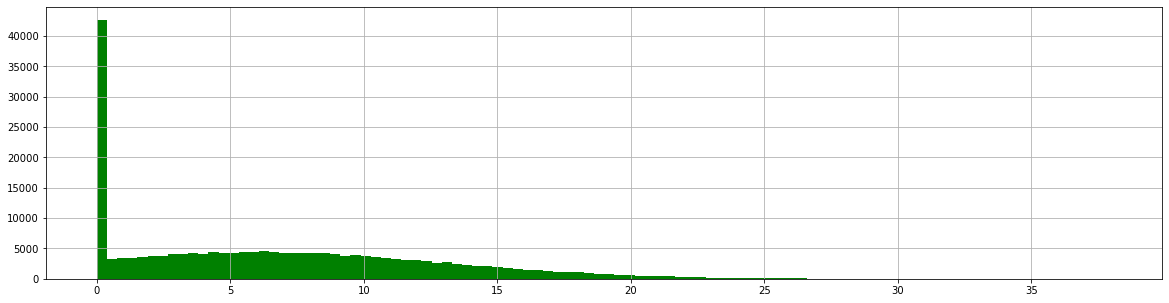

In [3]:
data_calls['duration'].hist(figsize=(20,5), color='green',bins=100)

<i>Очень много нулевых значений в столбце с длительностью звонков. Это могут быть звонки, которые ответчик не принял. Вероятно эти данные лучше не учитывать в будущем, так как это скосит нам среднее значение и медиану. </i>

<i>В таблице с информацией о звонках пропусков нет. Значения выглядят естественными.<br>Неверный тип данных для даты, исправим это на 2м шаге.</i>

In [4]:
display(data_internet.sample(10))
print(data_internet.info()) 
display(data_internet.describe())

,Unnamed: 0,id,mb_used,session_date,user_id
103336,103336,1347_81,584.81,2018-12-23,1347
25740,25740,1089_32,509.31,2018-04-24,1089
135787,135787,1455_154,449.02,2018-05-02,1455
96649,96649,1326_12,187.91,2018-07-30,1326
48527,48527,1168_295,952.48,2018-05-27,1168
11784,11784,1041_6,522.29,2018-12-05,1041
77945,77945,1263_16,181.49,2018-07-18,1263
35948,35948,1125_71,526.63,2018-09-10,1125
75789,75789,1254_333,1101.72,2018-06-05,1254
54826,54826,1184_105,0.00,2018-12-03,1184


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


<i>Удалим лишнюю колонку"Unnamed_0", которая дублирует индекс</i>

In [5]:
data_internet.drop('Unnamed: 0', axis=1, inplace = True)
#Проверим результат
display(data_internet.sample(10))

,id,mb_used,session_date,user_id
120847,1408_155,362.86,2018-08-08,1408
23628,1079_231,821.66,2018-08-06,1079
82920,1281_236,339.59,2018-12-17,1281
65467,1224_113,200.26,2018-12-19,1224
2891,1010_21,843.84,2018-12-10,1010
79398,1267_32,737.87,2018-11-14,1267
74778,1251_340,383.63,2018-11-26,1251
142778,1478_142,609.18,2018-09-05,1478
103046,1345_225,565.44,2018-07-15,1345
55211,1185_333,596.41,2018-04-29,1185


<AxesSubplot:>

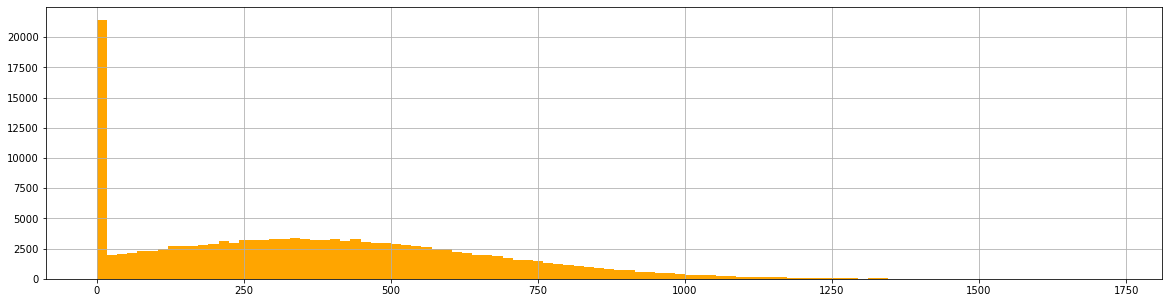

In [6]:
#Построим гисторграмму распределения использования трафика в течение сессии
data_internet['mb_used'].hist(figsize=(20,5), color='orange',bins=100,)

<i>Очень много значений около нуля. Вероятно была попытка входа в интернет, но в итоге она не состоялась. Например, если пользователь был не в зоне покрытия, и не полуичл ответа от сервера.<br>В дальнейшем эти данные возможно надо отсеять, так как они скосят среднее и медиану.</i>


<i>Тип данных в session_date неверный.<br>Сами значения выглядят естественными.<br>Пропусков нет.<br></i>

<i><b>Посмотрим таблицу с сообщениями</b></i>

In [7]:
display(data_messages.head(10))
print(data_messages.info()) 

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


<i>Замечаем неверный тип данных в колонке "message_date".Исправим это на 2м шаге.</i>|

<i><b>Посмотрим таблицу с тарифами</b></i>

In [8]:
display(data_tariffs.head(10))
print(data_tariffs.info()) 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


<i>С этой таблицей все в порядке </i>

<i><b>Посмотрим таблицу с данными пользователей</b></i>

In [9]:
display(data_users.head(10))
print(data_users.info()) 
print(Counter(data_users.tariff))
display(data_users.describe())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Counter({'smart': 351, 'ultra': 149})


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


<i>В дате прекращения много пропусков. Посмотрим, есть ли даты прекращения раньше чем даты регистрации</i>

In [10]:
data_users.loc[(data_users['churn_date'] < data_users['reg_date'])& (data_users['churn_date'].isnull()==False)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


<i>Таких строк в датасете нет </i>

<AxesSubplot:ylabel='city'>

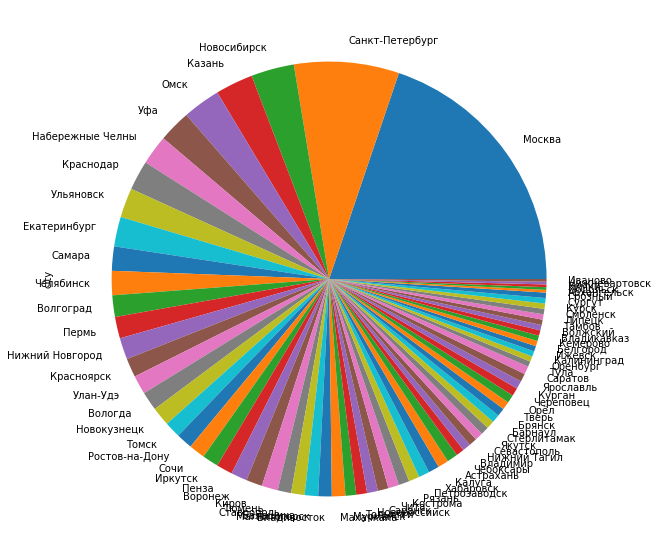

In [11]:
#Посмотрим распределение по городам
data_users['city'].value_counts().plot(kind='pie', figsize=(10, 10))

<i>Распеределение по возрасту и городам выглядит естественным</i>

<i><b>В целом данные выглядят адекватно. Найденные ошибки исправим в разделе "Предобработка данных", либо в дальнейшем когда будем строить графики.</b></i>

## Предобработка данных

### Изменение типов данных

In [12]:
#Преобразуем в datetime64 колонки data_calls,data_internet,data_messages, data_users
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])

print(data_calls.dtypes)
print(data_internet.dtypes)
print(data_messages.dtypes)
print(data_users.dtypes)

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object
id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object
user_id                int64
age                    int64
churn_date            object
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object


### Обработка дубликатов

In [13]:
#Проверим дубликаты
print(data_calls.duplicated().sum())
print(data_internet.duplicated().sum())
print(data_messages.duplicated().sum())
print(data_users.duplicated().sum())
#print(df.duplicated().sum())

0
0
0
0


<i>Дубликаты не обнаружены</i>

### Обработка пропусков

<i>Как таковых невалидных пропусков у нас нет, есть нулевые значения.</i>

In [14]:
#Посмотрим на количество строк с нулевым значением длительности звонка в data_calls
data_calls.loc[data_calls['duration']==0,'duration'].count()/data_calls['duration'].count()

0.19551644316336553

<i>Таких строк около 19,5%.<br>Посмотрим как они сдвигают среднее и медиану</i>

In [15]:
display(data_calls['duration'].describe())
display(data_calls.loc[data_calls['duration']!=0,'duration'].describe())

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

<i>Звонки с нулевой длительностью  уменьшают среднее на 1,64 секунды, а медиану на 1,74 секунды.<br>Хотя в рамках нашего задания длительность звонков нас не интересует, в дальнейшем эти данные могут понадобиться. Заменим  0  в 'duration на'значение на np.nan </i>

In [16]:
data_calls.loc[data_calls['duration']==0,'duration']=np.nan
display(data_calls['duration'].describe())

count    162994.000000
mean          8.397794
std           5.353022
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

<i>Теперь медиана и среднее у нас считаются так, как если бы нулевых звонков не было. И при этом данные строки остались, на случай если другим аналитикам понадобится само количество звонков </i>

In [17]:
#Посмотрим на количество строк с нулевым значением длительности звонка в data_calls
data_internet.loc[data_internet['mb_used']==0,'mb_used'].count()/data_internet['mb_used'].count()

0.13118155773916304

<i>Таких строк около 13,11%.
Посмотрим как они сдвигают среднее и медиану</i>

In [18]:
display(data_internet['mb_used'].describe())
display(data_internet.loc[data_internet['mb_used']!=0,'mb_used'].describe())

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

<i>Сессии с нулевым трафиком уменьшают среднее на 55,89 МегаБайт, а медиану на 52,53 МегаБайта.<br>Хотя в рамках нашего задания длительность сессий нас не интересует, в дальнейшем эти данные могут понадобиться. Заменим  0  в 'mb_used' на значение на np.nan </i>

In [19]:
data_internet.loc[data_internet['mb_used']==0,'mb_used']=np.nan
display(data_internet['mb_used'].describe())

count    129798.000000
mean        426.087210
std         255.596447
min           0.030000
25%         227.460000
50%         400.540000
75%         592.947500
max        1724.830000
Name: mb_used, dtype: float64

<i>Теперь медиана и среднее по сессиям интернета у нас считаются так, как если бы нулевых звонков не было. И при этом данные строки остались, на случай если другим аналитикам понадобится само количество сессий </i>

## Расчёты и добавление результатов в таблицу

In [20]:
#добавим количество сделанных звонков и израсходованных минут по месяцам.
#Для этого выделим месяц в таблице сначала с минутами, потом с трафиком
data_calls['month']=data_calls['call_date'].dt.month
display(data_calls.head(10))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,NaN,1000,7
1,1000_1,2018-08-17,NaN,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
5,1000_5,2018-11-02,NaN,1000,11
6,1000_6,2018-10-18,NaN,1000,10
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9
9,1000_9,2018-08-15,NaN,1000,8


In [21]:
#добавим колонку с округленным числом минут
data_calls['duration_rounded']=np.ceil(data_calls['duration'])
data_calls.head(10)

,id,call_date,duration,user_id,month,duration_rounded
0,1000_0,2018-07-25,NaN,1000,7,NaN
1,1000_1,2018-08-17,NaN,1000,8,NaN
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0
5,1000_5,2018-11-02,NaN,1000,11,NaN
6,1000_6,2018-10-18,NaN,1000,10,NaN
7,1000_7,2018-08-22,18.31,1000,8,19.0
8,1000_8,2018-09-15,18.44,1000,9,19.0
9,1000_9,2018-08-15,NaN,1000,8,NaN


In [22]:
#Добавим месяц отправки сообщения в исходную таблицу
data_messages['month']=data_messages['message_date'].dt.month
display(data_messages.head(10))

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [23]:
#Добавим месяц интернет сессии в таблицу
data_internet['month']=data_internet['session_date'].dt.month
display(data_internet.head(10))

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
5,1000_5,399.97,2018-10-02,1000,10
6,1000_6,540.08,2018-09-07,1000,9
7,1000_7,415.70,2018-07-11,1000,7
8,1000_8,505.40,2018-10-08,1000,10
9,1000_9,345.54,2018-09-03,1000,9


<i><b>Построим вспомогательные таблицы и склеим их</b></i>


In [24]:
#Сгруппируем data_calls по user_id и месяцу, и возьмем интересующие нас длительность и количество звонков.
calls_count=data_calls.pivot_table(index=['user_id','month'], values='duration_rounded',aggfunc=['count', 'sum'])
calls_count.columns = ['calls_count','duration_sum']
calls_count.sample(10)

,,calls_count,duration_sum
user_id,month,,
1420,11,27,199.0
1379,8,70,537.0
1175,9,33,291.0
1031,12,60,562.0
1477,11,71,531.0
1373,8,1,7.0
1165,12,33,278.0
1273,6,28,230.0
1332,5,3,36.0


In [25]:
#Сгруппируем data_messages по user_id и месяцу, и возьмем интересующие нас 
#количество сообщений
messages_count = data_messages.pivot_table(index = ['user_id','month'], values = 'message_date', aggfunc='count')
messages_count.columns = ['message_count']
messages_count.sample(10)

,,message_count
user_id,month,
1299,11,63
1425,10,77
1216,11,18
1373,2,38
1181,12,82
1045,5,55
1478,12,83
1282,12,71
1076,11,93


In [26]:
#Сгруппируем data_internet по user_id и месяцу, и возьмем интересующее нас 
#число мегабайт за месяц.
internet_count=data_internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc='sum')
internet_count.columns = ['mb_used_sum']
display(internet_count.sample(10))
internet_count.describe()

,,mb_used_sum
user_id,month,
1005,6,9863.19
1478,7,10908.79
1106,6,20016.74
1079,12,11141.03
1173,12,21834.73
1094,8,21323.07
1489,8,11050.56
1332,9,17383.13
1144,5,20397.60


,mb_used_sum
count,3203.000000
mean,17266.708626
std,7516.356902
min,0.000000
25%,12526.905000
50%,16963.110000
75%,21432.175000
max,49745.690000


<i>Преобразуем итог в гигабайты, согласно заданию - округление до следующего гигабайта вверх</i>

In [27]:
internet_count['mb_used_sum'] = internet_count['mb_used_sum'].apply(lambda i : np.ceil(i/1024))
internet_count.columns = ['gb_used_sum']
display(internet_count)
internet_count.describe()

gb_used_sum
user_id month             
1000    5              3.0
        6             23.0
        7             14.0
        8             14.0
        9             15.0
...                    ...
1498    10            21.0
1499    9              2.0
        10            18.0
        11            18.0
        12            13.0

[3203 rows x 1 columns]

,gb_used_sum
count,3203.000000
mean,17.358414
std,7.343379
min,0.000000
25%,13.000000
50%,17.000000
75%,21.000000
max,49.000000


<i>Склеим таблицу с сообщениями и звонками</i>

In [28]:
data=calls_count.merge(messages_count, on =['user_id','month'])
display(data.sample(10))

,,calls_count,duration_sum,message_count
user_id,month,,,
1287,11,52,475.0,6
1314,12,53,483.0,20
1496,12,65,518.0,51
1369,11,20,188.0,118
1009,8,27,249.0,9
1416,9,94,808.0,97
1417,10,41,333.0,78
1057,8,73,726.0,19
1168,11,108,1053.0,42


<i>Склеим полученную таблицу с данными по трафику </i>

In [29]:
data2 = messages_count.join(other=[internet_count,calls_count], how='outer').reset_index()
data2.sample(10)

,user_id,month,message_count,gb_used_sum,calls_count,duration_sum
1169,1182,10,30.0,27.0,22.0,215.0
1644,1260,12,NaN,13.0,93.0,872.0
1558,1246,9,4.0,3.0,8.0,70.0
2730,1425,6,86.0,13.0,75.0,667.0
2310,1366,7,41.0,12.0,23.0,223.0
16,1002,12,12.0,18.0,27.0,236.0
1745,1275,11,26.0,14.0,44.0,347.0
2501,1392,3,38.0,23.0,54.0,467.0
2922,1455,11,5.0,15.0,68.0,626.0
2872,1449,8,91.0,16.0,65.0,547.0


<i>Склеим полученную таблицу с данными пользователей</i>

In [30]:
data3 = data2.merge(data_users, left_on='user_id', right_on = 'user_id', how='outer')
data3.head(10)

,user_id,month,message_count,gb_used_sum,calls_count,duration_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,3.0,17.0,159.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,60.0,23.0,28.0,172.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,75.0,14.0,41.0,340.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,81.0,14.0,42.0,408.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,57.0,15.0,46.0,466.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10.0,73.0,15.0,44.0,350.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11.0,58.0,15.0,37.0,338.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12.0,70.0,10.0,38.0,333.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11.0,NaN,18.0,45.0,430.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12.0,NaN,14.0,47.0,414.0,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


<i>Добавим данные по тарифу в каждую строку, для простоты дальнейших расчетов</i>

In [31]:
data4 = data3.merge(data_tariffs, left_on='tariff', right_on = 'tariff_name', how='outer')
data4.head(10)

,user_id,month,message_count,gb_used_sum,calls_count,duration_sum,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,22.0,3.0,17.0,159.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,60.0,23.0,28.0,172.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,75.0,14.0,41.0,340.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,81.0,14.0,42.0,408.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,57.0,15.0,46.0,466.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
5,1000,10.0,73.0,15.0,44.0,350.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
6,1000,11.0,58.0,15.0,37.0,338.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
7,1000,12.0,70.0,10.0,38.0,333.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
8,1003,8.0,37.0,9.0,43.0,380.0,23,NaN,Москва,Белла,...,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,ultra
9,1003,9.0,91.0,13.0,105.0,961.0,23,NaN,Москва,Белла,...,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,ultra


<i>При склейке могли образоваться колонки, где не было сообщений, но быи например, только звонки. При сложении таких значений, с помощью знака "+", у нас будет получатсья NaN. Заменим NaN На 0, чтобы получались верные значения выручки.</i>

In [32]:
data4['message_count'].fillna(0, inplace=True)
data4['calls_count'].fillna(0, inplace=True)
data4['duration_sum'].fillna(0, inplace=True)
data4['gb_used_sum'].fillna(0, inplace=True)
data4.info()
data4.loc[data4['message_count'].isnull()==True]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   month                  3214 non-null   float64       
 2   message_count          3216 non-null   float64       
 3   gb_used_sum            3216 non-null   float64       
 4   calls_count            3216 non-null   float64       
 5   duration_sum           3216 non-null   float64       
 6   age                    3216 non-null   int64         
 7   churn_date             189 non-null    object        
 8   city                   3216 non-null   object        
 9   first_name             3216 non-null   object        
 10  last_name              3216 non-null   object        
 11  reg_date               3216 non-null   datetime64[ns]
 12  tariff                 3216 non-null   object        
 13  mes

,user_id,month,message_count,gb_used_sum,calls_count,duration_sum,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name


<b><i>Добавим колонку с помесячной выручкой</i></b>

In [33]:
#Добавим коэффициент учитывающий выработку/невыработку лимита по трафику, звонкам и сообщенмям
data4.loc[(data4['duration_sum'] <= data4['minutes_included']),'k_calls']=0
data4.loc[(data4['duration_sum'] > data4['minutes_included']),'k_calls']=1
data4.loc[(data4['gb_used_sum'] <= (data4['mb_per_month_included']/1024)),'k_GB']=0
data4.loc[(data4['gb_used_sum'] > (data4['mb_per_month_included']/1024)),'k_GB']=1
data4.loc[(data4['message_count'] <= data4['messages_included']),'k_mess']=0
data4.loc[(data4['message_count'] > data4['messages_included']),'k_mess']=1

#display(data4[['user_id','month','tariff_name','proceeds','k_calls','k_mess','k_GB']])

data4['proceeds']=((data4['duration_sum']-data4['minutes_included'])*data4['k_calls']*data4['rub_per_minute']
+((data4['gb_used_sum'])-data4['mb_per_month_included']/1024)*data4['k_GB']*data4['rub_per_gb']
+((data4['message_count'])-data4['messages_included'])*data4['k_mess']*data4['rub_per_message']+data4['rub_monthly_fee'])

display(data4[['user_id','month','tariff_name','proceeds','k_calls','k_mess','k_GB','proceeds']].sample(10))

,user_id,month,tariff_name,proceeds,k_calls,k_mess,k_GB,proceeds
1997,1217,9.0,smart,804.0,0.0,1.0,1.0,804.0
1653,1146,5.0,smart,550.0,0.0,0.0,0.0,550.0
2898,1429,8.0,smart,550.0,0.0,0.0,0.0,550.0
3121,1481,3.0,smart,1150.0,0.0,0.0,1.0,1150.0
2750,1401,3.0,smart,750.0,0.0,0.0,1.0,750.0
1577,1130,10.0,smart,583.0,0.0,1.0,0.0,583.0
1897,1193,6.0,smart,550.0,0.0,0.0,0.0,550.0
1520,1118,3.0,smart,691.0,1.0,0.0,0.0,691.0
792,1396,6.0,ultra,1950.0,0.0,0.0,0.0,1950.0
437,1254,8.0,ultra,1950.0,0.0,0.0,0.0,1950.0


In [34]:
print(data4.isnull().mean())
display(data4.loc[data4['proceeds'].isnull()==True])

user_id                  0.000000
month                    0.000622
message_count            0.000000
gb_used_sum              0.000000
calls_count              0.000000
duration_sum             0.000000
age                      0.000000
churn_date               0.941231
city                     0.000000
first_name               0.000000
last_name                0.000000
reg_date                 0.000000
tariff                   0.000000
messages_included        0.000000
mb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
tariff_name              0.000000
k_calls                  0.000000
k_GB                     0.000000
k_mess                   0.000000
proceeds                 0.000000
dtype: float64


,user_id,month,message_count,gb_used_sum,calls_count,duration_sum,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,k_calls,k_GB,k_mess,proceeds


## Анализ данных

In [35]:
#Создадим вспомогательные таблицы
table_h1_ultra=data4.query('tariff_name=="ultra"')[['duration_sum','message_count','gb_used_sum']]
display(table_h1_ultra.sample(10))
table_h1_smart=data4.query('tariff_name=="smart"')[['duration_sum','message_count','gb_used_sum']]
display(table_h1_smart.sample(10))

,duration_sum,message_count,gb_used_sum
230,1106.0,120.0,39.0
512,212.0,0.0,29.0
861,420.0,22.0,23.0
893,808.0,63.0,21.0
310,86.0,22.0,36.0
770,333.0,144.0,38.0
265,645.0,126.0,17.0
539,610.0,33.0,28.0
231,272.0,4.0,16.0
70,520.0,0.0,8.0


,duration_sum,message_count,gb_used_sum
1683,275.0,15.0,19.0
2291,387.0,117.0,7.0
1855,443.0,46.0,15.0
1213,443.0,37.0,24.0
2144,306.0,26.0,8.0
1078,454.0,61.0,22.0
2202,451.0,20.0,24.0
1181,12.0,0.0,3.0
2416,440.0,26.0,15.0
2191,606.0,9.0,21.0


<i>Постороим гистограммы сравнительно по тарифам</i>

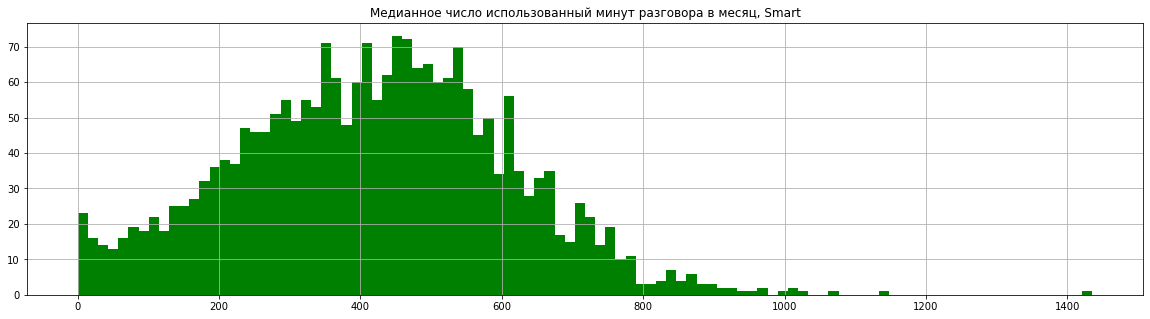

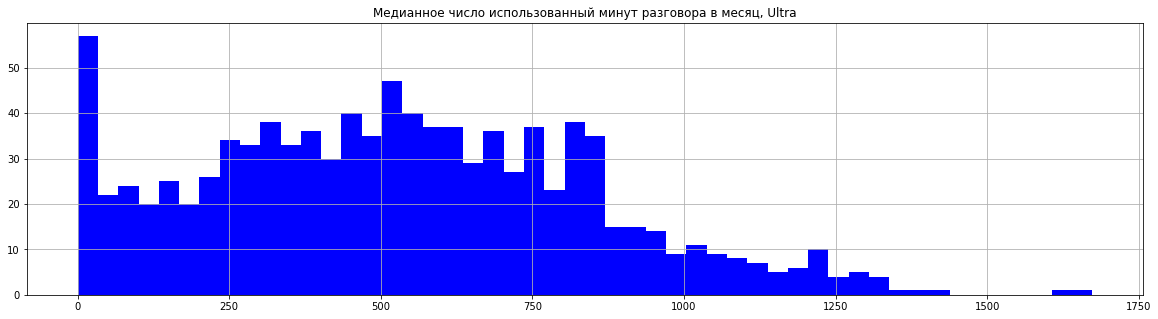

In [36]:
table_h1_smart['duration_sum'].hist(color='green', bins=100,figsize=(20,5))
plt.title('Медианное число использованный минут разговора в месяц, Smart')
plt.show()
table_h1_ultra['duration_sum'].hist(color='blue', bins=50,figsize=(20,5))
plt.title('Медианное число использованный минут разговора в месяц, Ultra')
plt.show()

<i>Распределение похоже на нормлаьное, с наибольшим числом значений около 420 минут для тарифа "Смарт" и около 500 минут для тарифа "Ультра"</i>

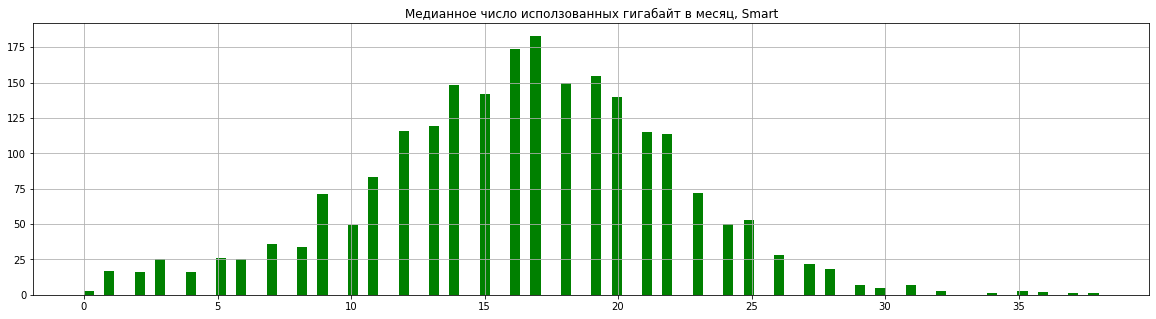

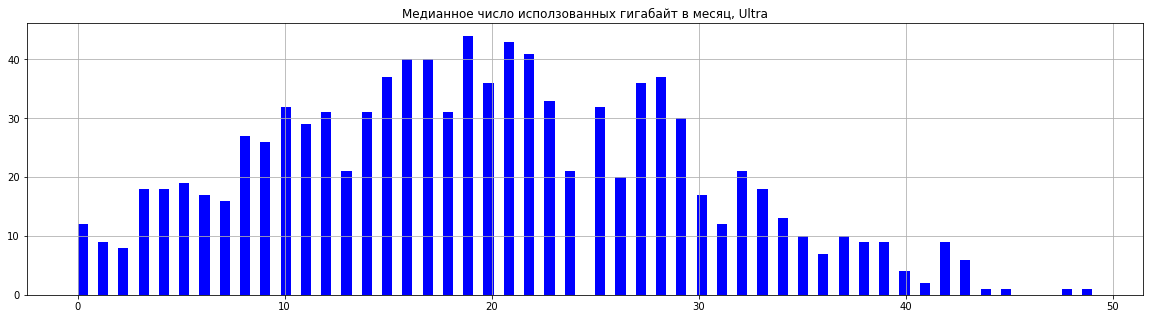

In [37]:
table_h1_smart['gb_used_sum'].hist(color='green', bins=100,figsize=(20,5))
plt.title('Медианное число исползованных гигабайт в месяц, Smart')
plt.show()
table_h1_ultra['gb_used_sum'].hist(color='blue', bins=100,figsize=(20,5))
plt.title('Медианное число исползованных гигабайт в месяц, Ultra')
plt.show()

<i>Распределение похоже на нормальное с пиком около 17 Гигабайт для тарифа "Смарт" и 19 Гигабайт для тарифа "Ультра"</i>

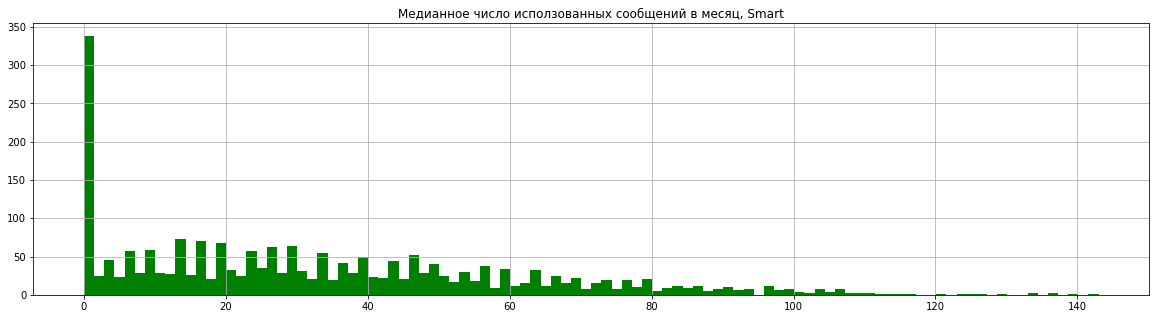

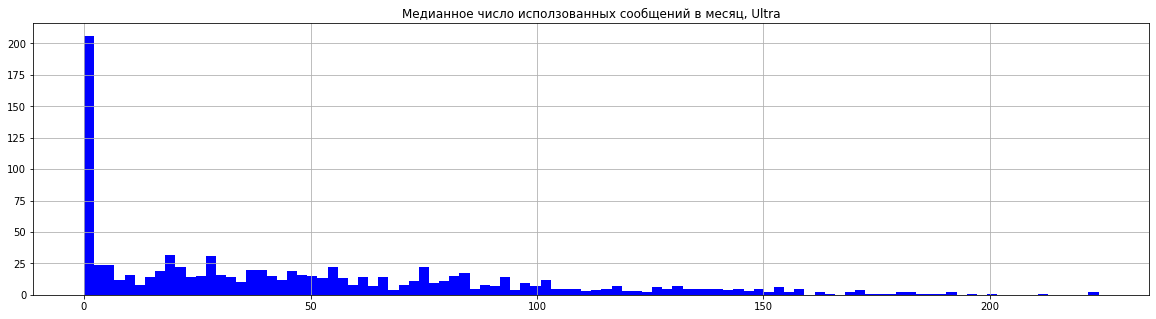

In [38]:
table_h1_smart['message_count'].hist(color='green', bins=100,figsize=(20,5))
plt.title('Медианное число исползованных сообщений в месяц, Smart')
plt.show()
table_h1_ultra['message_count'].hist(color='blue', bins=100,figsize=(20,5))
plt.title('Медианное число исползованных сообщений в месяц, Ultra')
plt.show()

<i>Видим мого значений сообщений около нуля. Значит, сообщения людям в целом не нужны,этот формат устаревает</i>

In [39]:
#Выведем таблицу со средним значением, стандартным отклонением, дисперсией для каждого тарифа
print('Тариф "Смарт"')
hh1 = table_h1_smart.describe().loc[['mean','std']]
hh1.loc['variance','duration_sum']=hh1.loc['std','duration_sum']**2
hh1.loc['variance','gb_used_sum']=hh1.loc['std','gb_used_sum']**2
hh1.loc['variance','message_count']=hh1.loc['std','message_count']**2
display(hh1)
print('Тариф "Ультра"')
hh2 = table_h1_ultra.describe().loc[['mean','std']]
hh2.loc['variance','duration_sum']=hh2.loc['std','duration_sum']**2
hh2.loc['variance','gb_used_sum']=hh2.loc['std','gb_used_sum']**2
hh2.loc['variance','message_count']=hh2.loc['std','message_count']**2
display(hh2)

Тариф "Смарт"


,duration_sum,message_count,gb_used_sum
mean,417.747534,33.369058,16.321525
std,190.476754,28.230396,5.756167
variance,36281.393836,796.955256,33.133453


Тариф "Ультра"


,duration_sum,message_count,gb_used_sum
mean,526.089249,49.313387,19.474645
std,317.887549,47.806040,9.868057
variance,101052.493549,2285.417425,97.378544


<b>Исходя из полученныз данных, пользователи тарифа "Смарт" не вырабатывают ресурс по длительности звонков в месяц и сообщениям, но превышают лимит по использованным гигабайтам трафика<br>
Пользователи тарифа "Ультра", несмотрия на абонентскую плату в 3 раза выше чем 2 тарифа "Смарт", расходуют пакет больше ненамного, и имеют в среднем огромный невыработанный запас по пакету</b>

## Проверка гипотез

<i><b>Проверим гипотезу что средняя выручка тарифа "Смарт" равна средней выручке тарифа "Ультра"</i></b>

In [40]:
#создадим Датасет только с клиентами на тарифе Ультра и только на тарифе Смарт
data4_ultra = data4.loc[data4['tariff_name']=='ultra']
data4_smart = data4.loc[data4['tariff_name']=='smart']

data4_smart_proceeds=data4_smart.pivot_table(index=['user_id','month'], values=['proceeds'], aggfunc=['median'])
data4_smart_proceeds.columns = ['median_proceeds']
display(data4_smart_proceeds.head(10))
data4_ultra_proceeds=data4_ultra.pivot_table(index=['user_id','month'], values=['proceeds'], aggfunc=['median'])
data4_ultra_proceeds.columns = ['median_proceeds']
display(data4_ultra_proceeds.head(10))

median_proceeds
user_id month                 
1001    11.0            1150.0
        12.0             550.0
1002    6.0              550.0
        7.0             1150.0
        8.0             1550.0
        9.0              950.0
        10.0             550.0
        11.0            1350.0
        12.0            1150.0
1005    1.0              550.0

median_proceeds
user_id month                 
1000    5.0             1950.0
        6.0             1950.0
        7.0             1950.0
        8.0             1950.0
        9.0             1950.0
        10.0            1950.0
        11.0            1950.0
        12.0            1950.0
1003    8.0             1950.0
        9.0             1950.0

<i>Нулевая гипотеза: Средняя выручка тарифа "Смарт" равна средней выручке тарифа "Ультра"<br>
Альтернативная гипотеза: Средняя выручка тарифа "Ультра" отличается от средней выручки тарифа "Смарт"</i>

In [41]:
#Проверим гипотезу о равнестве выручки пользователей тарифов "Ультра"  и "Смарт"
alpha = .05
results = st.ttest_ind(data4_smart_proceeds['median_proceeds'], data4_ultra_proceeds['median_proceeds'], equal_var = False)
print('p-значение:',results.pvalue)


p-значение: 4.2606313931076085e-250


In [42]:
if (results.pvalue< alpha) and (data4_ultra_proceeds['median_proceeds'].median() > data4_smart_proceeds['median_proceeds'].median()): 
    print("Отвергаем нулевую гипотезу, принимаем альтернативную гипотезу")
elif (results.pvalue< alpha) and (data4_ultra_proceeds['median_proceeds'].median() < data4_smart_proceeds['median_proceeds'].median()): 
    print("Отвергаем нулевую гипотезу, отвергаем альтернативную гипотезу")
elif (results.pvalue > alpha):
    print ("Принимаем нулевую гипотезу")

Отвергаем нулевую гипотезу, принимаем альтернативную гипотезу


<i>Нулевую гипотезу "Средняя выручка тарифа "Смарт" равна сердней выручке тарифа "Ультра" отвергаем. <br>Альтернативную гипотеза " Средняя выручка тарифа "Ультра" отличается от средней выручки тарифа "Смарт"принимаем.</i>

<i><b>Проверим что выруучка пользователей из Москвы отличатеся от выручки пользователей из других регионов</b></i>

<i>Нулевая гипотеза: Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.<br>
Альтернативная гипотеза: Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.</i>

In [43]:
#Создадим датасеты с пользователями только в г. Москва
display(data4.head())
data4_moscow = data4.loc[data4['city']=='Москва']
data4_other_cities = data4.loc[data4['city']!='Москва']

#print(data4.info())
#print(data4_moscow.info())
#print(data4_other_cities.info())
data4_moscow_proceeds=data4_moscow.pivot_table(index=['user_id','month'], values=['proceeds'], aggfunc=['median'])
data4_moscow_proceeds.columns = ['median_proceeds']
display(data4_moscow_proceeds.head(10))
#data4_ultra_proceeds['median_proceeds'].value_counts()
data4_other_cities_proceeds=data4_other_cities.pivot_table(index=['user_id','month'], values=['proceeds'], aggfunc=['median'])
data4_other_cities_proceeds.columns = ['median_proceeds']
display(data4_other_cities_proceeds.head(10))

,user_id,month,message_count,gb_used_sum,calls_count,duration_sum,age,churn_date,city,first_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,k_calls,k_GB,k_mess,proceeds
0,1000,5.0,22.0,3.0,17.0,159.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
1,1000,6.0,60.0,23.0,28.0,172.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
2,1000,7.0,75.0,14.0,41.0,340.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
3,1000,8.0,81.0,14.0,42.0,408.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0
4,1000,9.0,57.0,15.0,46.0,466.0,52,NaN,Краснодар,Рафаил,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0


median_proceeds
user_id month                 
1001    11.0            1150.0
        12.0             550.0
1003    8.0             1950.0
        9.0             1950.0
        10.0            1950.0
        11.0            1950.0
        12.0            1950.0
1007    4.0              550.0
        5.0             1150.0
        6.0              685.0

median_proceeds
user_id month                 
1000    5.0             1950.0
        6.0             1950.0
        7.0             1950.0
        8.0             1950.0
        9.0             1950.0
        10.0            1950.0
        11.0            1950.0
        12.0            1950.0
1002    6.0              550.0
        7.0             1150.0

In [44]:
alpha = .05
results_cities = st.ttest_ind(data4_moscow_proceeds['median_proceeds'], data4_other_cities_proceeds['median_proceeds'], equal_var = False)
print('p-значение:',results_cities.pvalue)

if (results_cities.pvalue< alpha) and (data4_moscow_proceeds['median_proceeds'].median() > data4_other_cities_proceeds['median_proceeds'].median()): 
    print("Отвергаем нулевую гипотезу, принимаем альтернативную гипотезу")
if (results_cities.pvalue< alpha) and (data4_moscow_proceeds['median_proceeds'].median() < data4_other_cities_proceeds['median_proceeds'].median()): 
    print("Отвергаем нулевую гипотезу, отвергаем альтернативную гипотезу")
if (results_cities.pvalue > alpha):
    print ("Принимаем нулевую гипотезу")

p-значение: 0.5257376663729298
Принимаем нулевую гипотезу


<i>Нулевую гипотезу Средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов" не отвергаем. <br>Альтернативную гипотезу "Средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов" отвергаем</i>

## Общий вывод

<i><b>Исходя из полученных данных, видим что клиенты тарифа Ультра обычно не перерасходуют свой лимит. <br>
Это означает, что самый выгодный тариф для "Мегалайн" - Ультра, поскольку в среднем его пользователи не загружают мощности, отведенные под него, но и платят в 3 раза больше. <br>
В свою очередь, для пользователя самый выгодный тариф - "Смарт". Но пользователи тарифа смарт в среднем превышают лимит по интернету, что мы можем использовать в свою пользу.
<br>
Исходя из проверки гипотез, видим что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов. При том что доход в г. Москва несопоставимо больше. Можно предлагать пользователям из Москвы премиальные услуги, пробовать ненавязчиво монетизировать эту разницу.
</b></i>